# project hackathon code

## importing important libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

## Reading the data files

In [4]:
df = pd.read_csv('Train_Data.csv')
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [5]:
df.shape

(4571, 9)

## Exploratory Data Analysis

### Checking for null values

<AxesSubplot:>

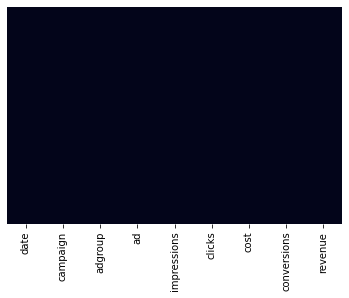

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [7]:
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of             date    campaign    adgroup     ad  impressions  clicks  cost  \
0     01-08-2020  campaign 1  adgroup 1   ad 1           24       6  0.08   
1     01-08-2020  campaign 1  adgroup 2   ad 1            1       0  0.00   
2     01-08-2020  campaign 1  adgroup 3   ad 1           13       4  0.04   
3     01-08-2020  campaign 1  adgroup 4   ad 1            5       4  0.08   
4     01-08-2020  campaign 1  adgroup 1   ad 2          247     126  1.29   
...          ...         ...        ...    ...          ...     ...   ...   
4566  28-02-2021  campaign 1  adgroup 3  ad 55           19       6  0.07   
4567  28-02-2021  campaign 1  adgroup 4  ad 55            1       0  0.00   
4568  28-02-2021  campaign 1  adgroup 3  ad 56           16       8  0.12   
4569  28-02-2021  campaign 1  adgroup 1  ad 56           37      13  0.23   
4570  28-02-2021  campaign 1  adgroup 1  ad 55           19      10  0.14   

      conversions  revenue  
0             

In [9]:
df['adgroup'].value_counts()

adgroup 3    1672
adgroup 1    1314
adgroup 4     858
adgroup 2     727
Name: adgroup, dtype: int64

## Handling categorical features

In [10]:
columns= ['date', 'campaign', 'adgroup', 'ad']

In [11]:
len(columns)

4

In [12]:
#funtion for one hot encoding

def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [13]:
main_df = df.copy()

In [14]:
# reading test data
test_df = pd.read_csv('Test_Data.csv')

In [15]:
test_df.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


# Concatenating the train and test data for one hot encoding

In [16]:

final_df = pd.concat([df,test_df],axis=0)

In [17]:
final_df.shape

(4889, 9)

In [18]:
final_df = category_onehot_multcols(columns)

date
campaign
adgroup
ad


In [19]:
final_df.shape

(4889, 308)

In [20]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [21]:
final_df.shape

(4889, 308)

In [22]:
final_df.head()

,impressions,clicks,cost,conversions,revenue,01-02-2021,01-03-2021,01-08-2020,01-09-2020,01-10-2020,...,ad 69,ad 7,ad 70,ad 71,ad 72,ad 73,ad 74,ad 75,ad 8,ad 9
0,24,6,0.08,0,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.00,0,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,4,0.04,0,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,4,0.08,0,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,247,126,1.29,4,925.71,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extracting back the train and test data

In [23]:
df_train = final_df.iloc[:4571,:]
df_test = final_df.iloc[4571:,:]

In [24]:
df_test.drop(['revenue'],axis=1,inplace = True)

C:\Users\Intel\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_test.shape

(318, 307)

In [26]:
X_train = df_train.drop(['revenue'],axis=1)
y_train = df_train['revenue']

## Deploying XGBoost Regression ML Model

In [27]:
import xgboost
regressor = xgboost.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred = regressor.predict(df_test)

In [29]:
y_pred.shape

(318,)

## Hyperparameter tuning for XGB regressor

In [30]:
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]

In [31]:
# pred = pd.DataFrame(y_pred)
# pred.columns = ['revenue']
# pred.to_csv('Sample_submission.csv',index=False)

In [32]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]

hyperparameter_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [33]:

random_cv = RandomizedSearchCV(estimator=regressor,
             param_distributions=hyperparameter_grid,
                              cv=5, n_iter=50,
                              scoring = 'neg_mean_absolute_error',n_jobs = 4,
                              verbose =5,
                              return_train_score = True,
                              random_state = 42)

In [34]:
random_cv.fit(X_train,y_train)

In [35]:
random_cv.best_params_

In [36]:
random_cv.best_estimator_

In [37]:
regressor = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
#fitting with the hyperparameter tuned model
regressor.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
ypred = regressor.predict(df_test)

In [40]:
#predicted value with the model
ypred

array([ 1.4229659e+02, -6.0819852e-01, -6.0819852e-01, -6.0819852e-01,
       -6.0819852e-01, -6.0819852e-01,  1.5717654e+02, -6.0819852e-01,
        1.3902538e+02, -6.0819852e-01,  3.3466742e+02, -6.0819852e-01,
       -6.0819852e-01,  3.1927866e+02, -6.0819852e-01,  1.4229659e+02,
        1.2084910e+00,  1.3036996e+02,  1.2084910e+00,  1.4229659e+02,
       -6.0819852e-01,  1.2084910e+00, -6.0819852e-01,  4.2390408e+02,
       -6.0819852e-01, -6.0819852e-01,  5.5228448e+02,  1.4056711e+02,
       -6.0819852e-01, -6.0819852e-01,  4.1823846e+02, -6.0819852e-01,
        7.6705035e+02,  3.1489331e+02,  1.4047989e+02, -6.0819852e-01,
        1.2684407e+02,  1.2084910e+00, -6.0819852e-01, -6.0819852e-01,
       -6.0819852e-01,  1.2084910e+00, -6.0819852e-01,  1.2084910e+00,
        1.2084910e+00, -6.0819852e-01, -6.0819852e-01, -6.0819852e-01,
       -2.8652406e+00, -6.0819852e-01, -6.0819852e-01, -6.0819852e-01,
       -2.5166645e+00,  3.1489331e+02,  1.4582246e+02,  1.4047989e+02,
      

In [41]:
samp = pd.read_csv('Sample_Submission.csv')

## saving the predicted value in the stated sample format

In [42]:
pred = pd.DataFrame(ypred)
pred.columns = ['revenue']
pred.to_csv('Sample_Submission_xgbhypr1.csv',index=False)